In [2]:
import os,sys
import scanpy as sc
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import anndata as an



In [3]:
DB = pd.read_csv('/home/efarr/Documents/BC/TestDBs/minimum_db.csv')
DB = pd.read_csv('/home/efarr/Documents/BC/TestDBs/minimum_db2.csv')
# rename columns 7:12 of DB to ['Combined score',  'Database', 'Experimental', 'Textmining', 'Prediction']
DB.rename(columns={DB.columns[7]:'Combined score', DB.columns[8]:'Database', DB.columns[9]:'Experimental', DB.columns[10]:'Textmining', DB.columns[11]:'Prediction'}, inplace=True)

In [4]:
DB['connection'] = DB['HMDB'] + '_' + DB['Symbol']
nonstitch = DB[DB['DB'] != '"StitchMetaboliteReceptor"']
nonstitch_connections = nonstitch['connection'].unique()
stitch = DB[DB['DB'] == '"StitchMetaboliteReceptor"']
stitch_cut = stitch[stitch['connection'].isin(nonstitch_connections)]
#stitch_cut.iloc[:,5:].hist(figsize=(20,10), layout=(2,3), bins=20)

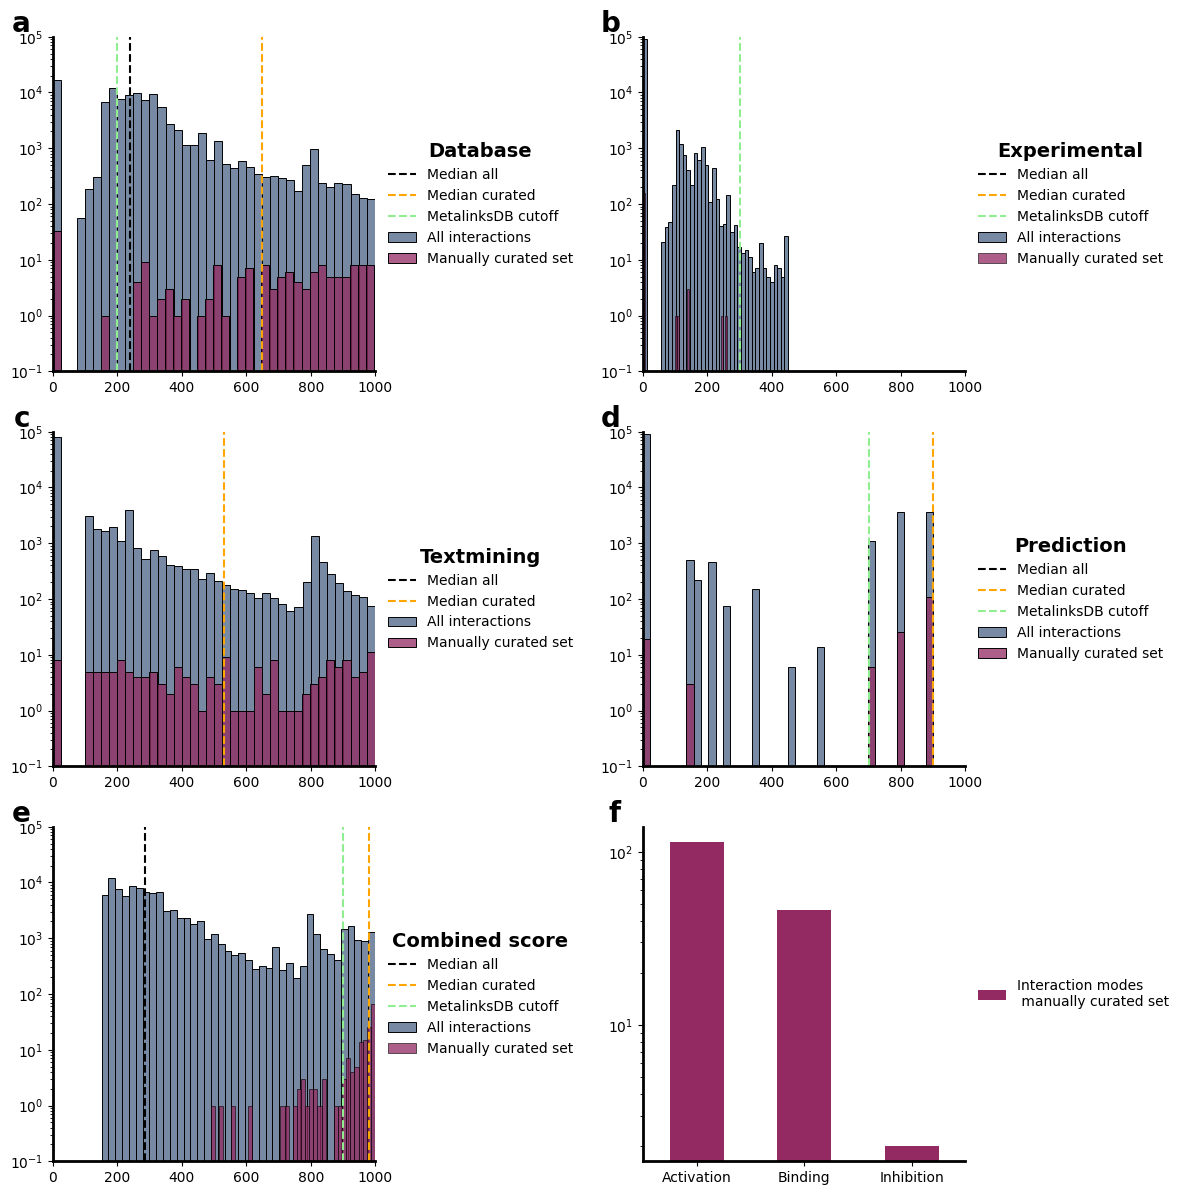

In [5]:
matching_columns = ['Database', 'Experimental', 'Textmining', 'Prediction', 'Combined score']


# Step 2: Subset columns from both dataframes
df1_subset = DB[matching_columns]  # Replace df1 with your first dataframe
df2_subset = stitch_cut[matching_columns]  # Replace df2 with your second dataframe

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

# Step 4: Plot histograms using seaborn
for i, column in enumerate(matching_columns):
    sns.histplot(df1_subset[column], ax=axes[i], color='#788AA3', label='All interactions', bins=40, alpha=1)
    sns.histplot(df2_subset[column], ax=axes[i], color='#932A61', label='Manually curated set', bins=40)

    axes[i].set_yscale('log')
    axes[i].set_xlim(0, 1000)
    axes[i].set_ylim(0.1, 100000)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['left'].set_linewidth(2)
    axes[i].spines['bottom'].set_linewidth(2)
    
    median1 = df1_subset[column].median()
    median2 = df2_subset[column].median()

    axes[i].axvline(median1, color='Black', linestyle='--', label='Median all')
    axes[i].axvline(median2, color='Orange', linestyle='--', label='Median curated')

    if i == 0:
        axes[i].axvline(200, color='lightgreen', linestyle='--', label='MetalinksDB cutoff')
    elif i == 1:
        axes[i].axvline(300, color='lightgreen', linestyle='--', label='MetalinksDB cutoff')
    elif i == 3:
        axes[i].axvline(700, color='lightgreen', linestyle='--', label='MetalinksDB cutoff')
    elif i == 4:
        axes[i].axvline(900, color='lightgreen', linestyle='--', label='MetalinksDB cutoff')

    legend_title = matching_columns[i]

    axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5), title=legend_title)
    axes[i].get_legend().get_frame().set_linewidth(0.0)
    axes[i].get_legend().get_title().set_fontweight('bold')
    axes[i].get_legend().get_title().set_fontsize(14)
    axes[i].get_legend().get_title().set_ha('left')


stitch_cut['Mode'].value_counts().plot(kind='bar', label='Interaction modes \n manually curated set', color='#932A61', ax=axes[5], rot=0)

axes[5].set_yscale('log')
axes[5].set_xlabel('')
axes[5].set_ylabel('')
axes[5].spines['right'].set_visible(False)
axes[5].spines['top'].set_visible(False)
axes[5].spines['left'].set_linewidth(2)
axes[5].spines['bottom'].set_linewidth(2)
axes[5].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[5].get_legend().get_frame().set_linewidth(0.0)
axes[5].set_xticklabels(['Activation', 'Binding', 'Inhibition'], rotation=0)

axes[0].text(-0.07, 1.08, 'a', transform=axes[0].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axes[1].text(-0.07, 1.08, 'b', transform=axes[1].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axes[2].text(-0.07, 1.08, 'c', transform=axes[2].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axes[3].text(-0.07, 1.08, 'd', transform=axes[3].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axes[4].text(-0.07, 1.08, 'e', transform=axes[4].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axes[5].text(-0.07, 1.08, 'f', transform=axes[5].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

plt.tight_layout()

# Show the plots
plt.show()


In [6]:
DB['connection'] = DB['HMDB'] + '_' + DB['Symbol']
cellphoneDB = DB[DB['DB'] == '"CellphoneMetaboliteReceptor"']
cellphoneDB_connections = cellphoneDB['connection'].unique()
Neuronchat = DB[DB['DB'] == '"NeuronchatMetaboliteReceptor"']
Neuronchat_connections = Neuronchat['connection'].unique()
stitch = DB[DB['DB'] == '"StitchMetaboliteReceptor"']
stitch_cut1 = stitch[stitch['connection'].isin(cellphoneDB_connections)]
stitch_cut2 = stitch[stitch['connection'].isin(Neuronchat_connections)]
#stitch_cut1.iloc[:,5:].hist(figsize=(20,10), layout=(2,3), bins=20)

/tmp/ipykernel_19641/558351477.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stitch_cut1['dataset'] = 'CellphoneDB'
/tmp/ipykernel_19641/558351477.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stitch_cut2['dataset'] = 'NeuronChat'


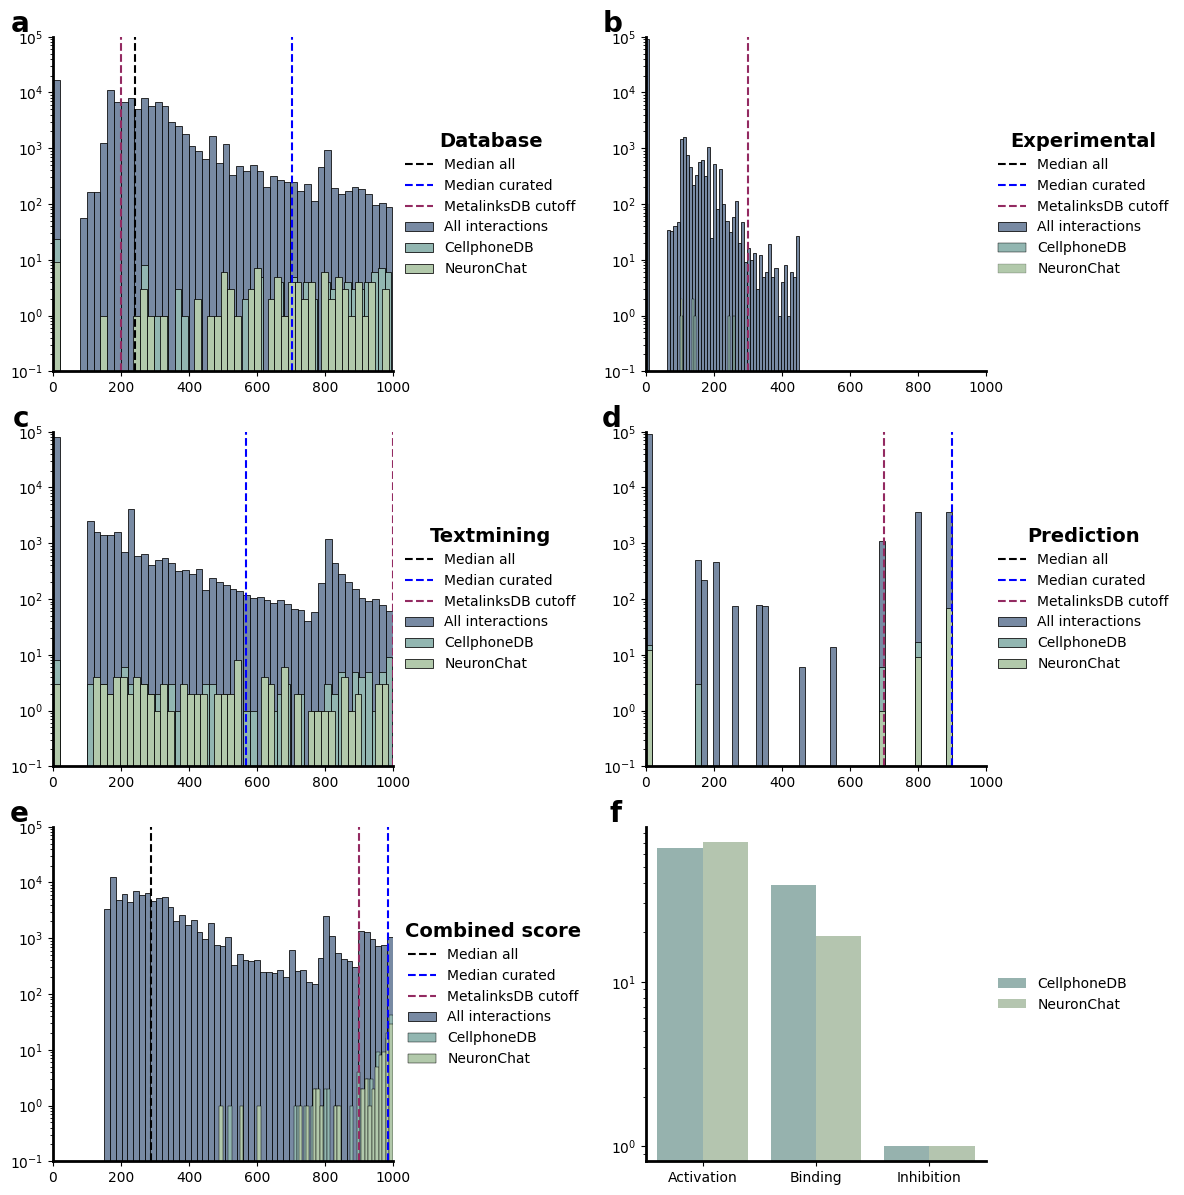

In [7]:
matching_columns = ['Database', 'Experimental', 'Textmining', 'Prediction', 'Combined score']


# Step 2: Subset columns from both dataframes
df1_subset = DB[matching_columns]  # Replace df1 with your first dataframe
df2_subset = stitch_cut1[matching_columns]  # Replace df2 with your second dataframe
df3_subset = stitch_cut2[matching_columns] 

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

# Step 4: Plot histograms using seaborn
for i, column in enumerate(matching_columns):
    sns.histplot(df1_subset[column], ax=axes[i], color='#788AA3', label='All interactions', bins=50, alpha=1)
    sns.histplot(df2_subset[column], ax=axes[i], color='#92B6B1', label='CellphoneDB', bins=50, alpha=1)
    sns.histplot(df3_subset[column], ax=axes[i], color='#B2C9AB', label='NeuronChat', bins=50, alpha=1)

    axes[i].set_yscale('log')
    axes[i].set_xlim(0, 1000)
    axes[i].set_ylim(0.1, 100000)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['left'].set_linewidth(2)
    axes[i].spines['bottom'].set_linewidth(2)
    
    median1 = df1_subset[column].median()
    median2 = df2_subset[column].median()

    axes[i].axvline(median1, color='Black', linestyle='--', label='Median all')
    axes[i].axvline(median2, color='Blue', linestyle='--', label='Median curated')

    if i == 0:
        axes[i].axvline(200, color='#932A61', linestyle='--', label='MetalinksDB cutoff')
    elif i == 1:
        axes[i].axvline(300, color='#932A61', linestyle='--', label='MetalinksDB cutoff')
    elif i == 2:
        axes[i].axvline(1000, color='#932A61', linestyle='--', label='MetalinksDB cutoff')
    elif i == 3:
        axes[i].axvline(700, color='#932A61', linestyle='--', label='MetalinksDB cutoff')
    elif i == 4:
        axes[i].axvline(900, color='#932A61', linestyle='--', label='MetalinksDB cutoff')

    legend_title = matching_columns[i]

    axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5), title=legend_title)
    axes[i].get_legend().get_frame().set_linewidth(0.0)
    axes[i].get_legend().get_title().set_fontweight('bold')
    axes[i].get_legend().get_title().set_fontsize(14)
    axes[i].get_legend().get_title().set_ha('left')


stitch_cut1['dataset'] = 'CellphoneDB'
stitch_cut2['dataset'] = 'NeuronChat'

merged = pd.concat([stitch_cut1, stitch_cut2])
sns.countplot(data=merged, x='Mode', hue='dataset', palette=['#92B6B1', '#B2C9AB'])

#stitch_cut['Mode'].value_counts().plot(kind='bar', label='Interaction modes \n manually curated set', color='#932A61', ax=axes[5], rot=0)

axes[5].set_yscale('log')
axes[5].set_xlabel('')
axes[5].set_ylabel('')
axes[5].spines['right'].set_visible(False)
axes[5].spines['top'].set_visible(False)
axes[5].spines['left'].set_linewidth(2)
axes[5].spines['bottom'].set_linewidth(2)
axes[5].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[5].get_legend().get_frame().set_linewidth(0.0)
axes[5].set_xticklabels(['Activation', 'Binding', 'Inhibition'], rotation=0)

axes[0].text(-0.07, 1.08, 'a', transform=axes[0].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axes[1].text(-0.07, 1.08, 'b', transform=axes[1].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axes[2].text(-0.07, 1.08, 'c', transform=axes[2].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axes[3].text(-0.07, 1.08, 'd', transform=axes[3].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axes[4].text(-0.07, 1.08, 'e', transform=axes[4].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
axes[5].text(-0.07, 1.08, 'f', transform=axes[5].transAxes, fontsize=20, fontweight='bold', va='top', ha='right')

plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
# interpret DB['CellLoc'] as a series of lists and count how many times each cell location appears
series = DB['CellLoc'].str.split(',').explode()
#remove " ] and [ " and whitespace from the series
series = series.str.replace(']','')
series = series.str.replace('[','')
series = series.str.replace(' ','')
locs = series.value_counts()
modes = DB['Mode'].value_counts()
receptors = DB['Receptor'].value_counts()

/tmp/ipykernel_46857/1369420708.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  series = series.str.replace(']','')
/tmp/ipykernel_46857/1369420708.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  series = series.str.replace('[','')


<AxesSubplot:title={'center':'Receptor'}>

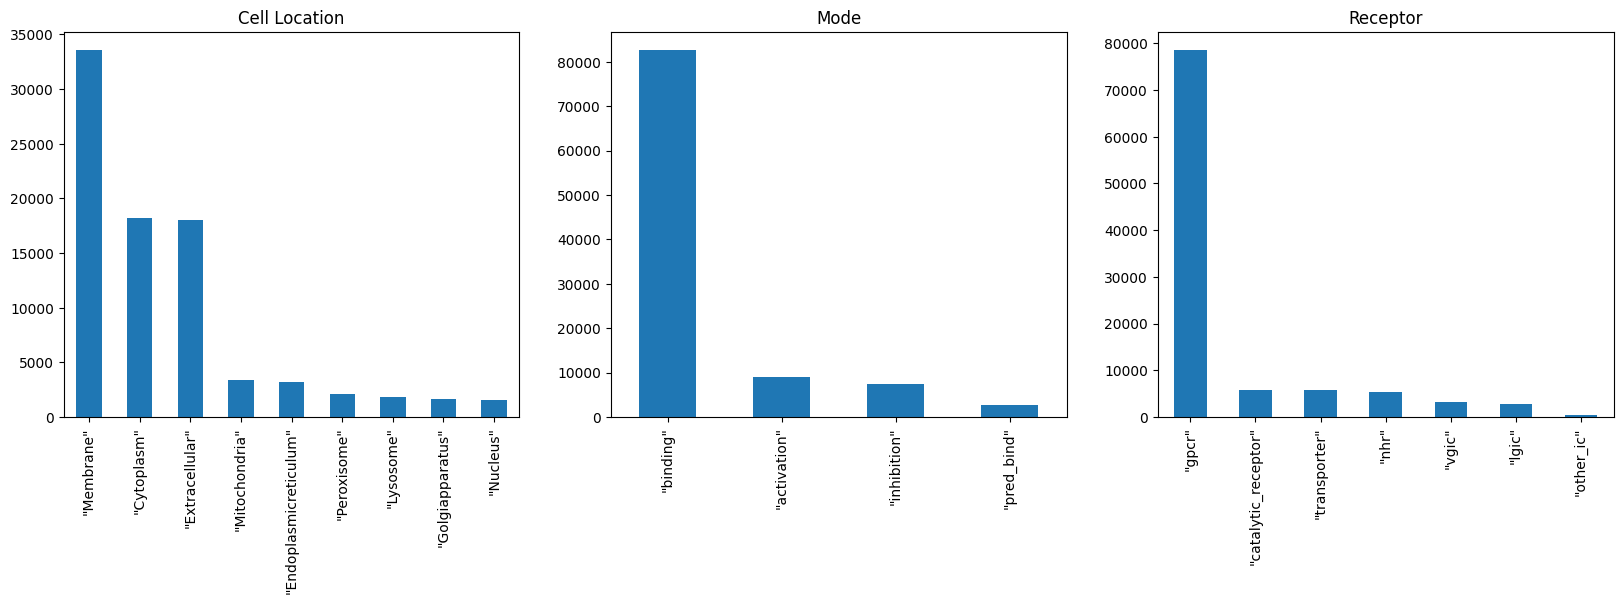

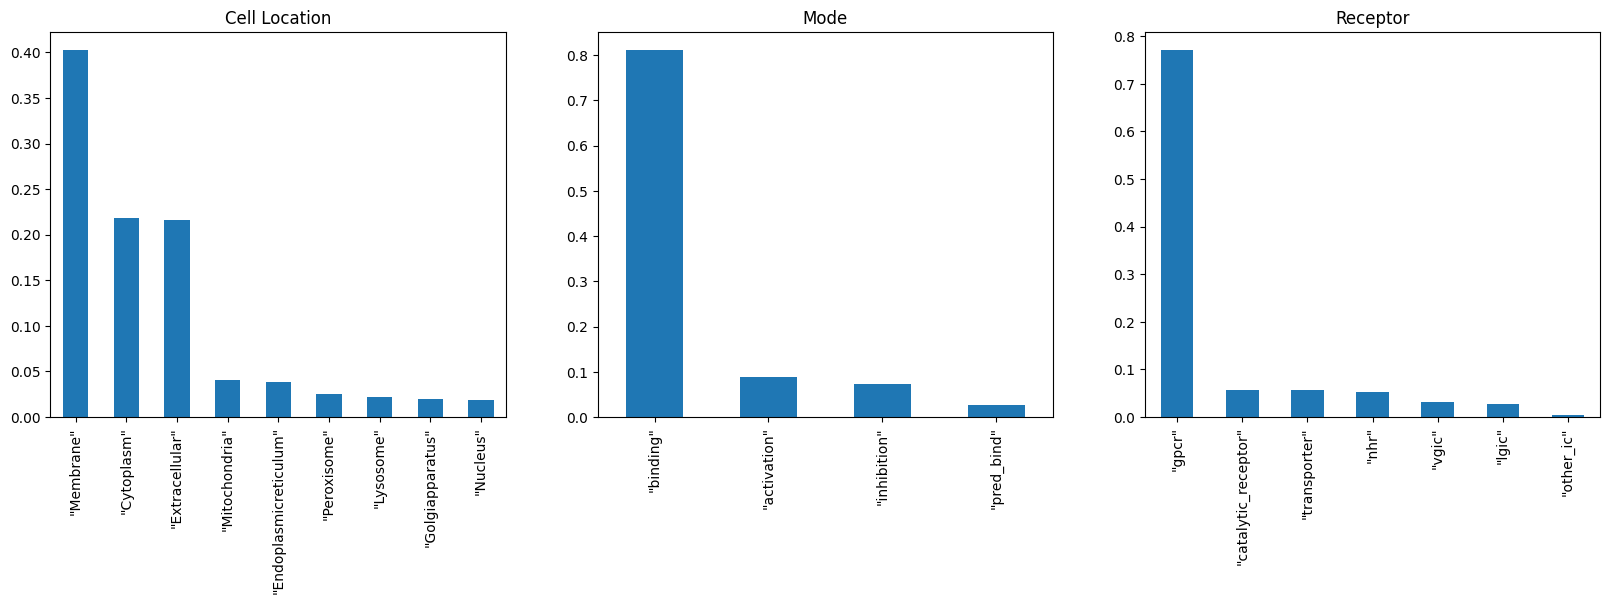

In [ ]:
# create a plot with 3 subplots of the 3 series as stacked barplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
locs.plot(kind='bar', stacked = True, ax=ax1, title='Cell Location')
modes.plot(kind='bar', ax=ax2, title='Mode')
receptors.plot(kind='bar', ax=ax3, title='Receptor')

# change to percentages and plot as stacked barplot with only one bar
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
(locs/locs.sum()).plot(kind='bar', ax=ax1, title='Cell Location')
(modes/modes.sum()).plot(kind='bar', ax=ax2, title='Mode')
(receptors/receptors.sum()).plot(kind='bar', ax=ax3, title='Receptor')



ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 3 with shape (7,).

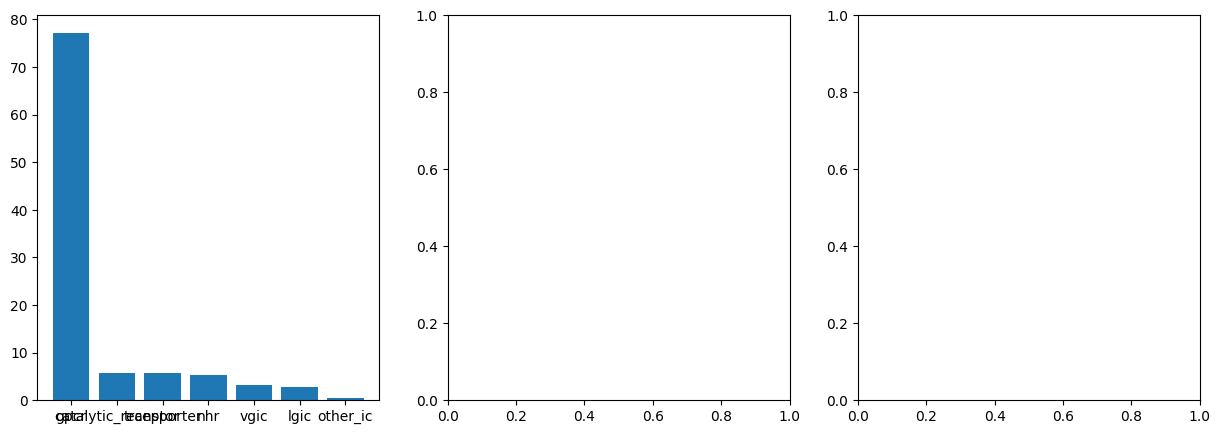

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data preprocessing
receptor_data = {
    'Receptor': ["gpcr", "catalytic_receptor", "transporter", "nhr", "vgic", "lgic", "other_ic"],
    'Counts': [78481, 5789, 5734, 5313, 3255, 2876, 422]
}

mode_data = {
    'Mode': ["binding", "activation", "inhibition", "pred_bind"],
    'Counts': [82595, 9099, 7538, 2638]
}

cell_loc_data = {
    'CellLoc': ["Membrane", "Cytoplasm", "Extracellular", "Mitochondria", "Endoplasmicreticulum",
                "Peroxisome", "Lysosome", "Golgiapparatus", "Nucleus"],
    'Counts': [33540, 18205, 17996, 3354, 3242, 2102, 1795, 1606, 1557]
}

receptor_df = pd.DataFrame(receptor_data)
mode_df = pd.DataFrame(mode_data)
cell_loc_df = pd.DataFrame(cell_loc_data)

# Calculate percentages for receptor and mode data
total_receptor = receptor_df['Counts'].sum()
receptor_df['Percentage'] = (receptor_df['Counts'] / total_receptor) * 100

total_mode = mode_df['Counts'].sum()
mode_df['Percentage'] = (mode_df['Counts'] / total_mode) * 100

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plotting the stacked barplot for receptor and mode data
axes[0].bar(receptor_df['Receptor'], receptor_df['Percentage'], label='Receptor')
axes[0].bar(mode_df['Mode'], mode_df['Percentage'], bottom=receptor_df['Percentage'], label='Mode', alpha=0.7)
axes[0].set_ylabel('Percentage')
axes[0].set_title('Receptor and Mode Data')
axes[0].legend()

# Plotting the barplot for cell location data
axes[1].bar(cell_loc_df['CellLoc'], cell_loc_df['Counts'])
axes[1].set_ylabel('Count')
axes[1].set_title('Cellular Location Data')

# Plotting the barplot for cell location data as percentages
axes[2].bar(cell_loc_df['CellLoc'], cell_loc_df['Percentage'])
axes[2].set_ylabel('Percentage')
axes[2].set_title('Cellular Location Data (Percentage)')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

